Con los resultados obtenidos en el ACP de los datos “churn”, procedemos ahora a obtener una tipología de los clientes de la entidad bancaria según su posición en los diversos productos financieros. Para ello disponemos del Análisis de Componentes Principales realizado con los clientes “normales” (que no han sido baja) en la Sesión previa. 

In [2]:
#LIBRARIES
library(tidyr)
library(mice)
library(magrittr)
library(stringr)
library(dplyr)
library(FactoMineR)
library(class)

In [3]:
# LEER FICHERO
#setwd("/Users/Nuria/Documents/UPC/Analytics")
churn <- read.delim("churn.txt", header = TRUE, sep = " ")
# IMPUTACIÓN DE VALORES NULOS Y CORRECCIÓN DE DATOS
churn$antig[churn$antig==99] <- NA 
churn <- complete(mice(churn, m=1)) 
churn <- churn %>% distinct %>% transform(., Baja = str_sub(.$Baja,-2,-1), 
                                          edatcat = str_sub(.$edatcat,9,-1), 
                                          Nomina = str_sub(.$Nomina,-2,-1), 
                                          Pension = str_sub(.$Pension,-2,-1), 
                                          Debito_normal = str_sub(.$Debito_normal, -2,-1), 
                                          Debito_aff = str_sub(.$Debito_aff, -2,-1), 
                                          VISA = str_sub(.$VISA, -2,-1), 
                                          VISA_aff = str_sub(.$VISA_aff, -2,-1), 
                                          MCard = str_sub(.$MCard, -2,-1), 
                                          Amex = str_sub(.$Amex, -2,-1), 
                                          dif_resid = str_sub(.$dif_resid, -2,-1)) %>% 
  transform (., sexo = ifelse(.$sexo=="No informado", "MUJER", "HOMBRE")) %>% 
  .[complete.cases(.), ] %>% 
  rename(Edad=edatcat, 
         Sexo=sexo, 
         Antig=antig, 
         Debito_Normal=Debito_normal, 
         Debito_Aff=Debito_aff, 
         VISA_Aff=VISA_aff, 
         Oper_Caj_Libreta=oper_caj_Libreta, 
         Oper_Ven_Libreta=oper_ven_Libreta, 
         Total_Activo=Total_activo, 
         Dif_Resid=dif_resid, 
         Dif_Libreta=dif_Libreta, 
         Dif_Plazo=dif_Plazo, 
         Dif_Ahorro=dif_Ahorro, 
         Dif_CC=dif_CC, 
         Dif_Largo_Plazo=dif_Largo_plazo, 
         Dif_Fondos_Inv=dif_Fondos_inv, 
         Dif_Seguros=dif_Seguros, 
         Dif_Planes_Pension=dif_Planes_pension, 
         Dif_Hipoteca=dif_Hipoteca, 
         Dif_Prest_Personales=dif_Prest_personales) 


 iter imp variable
  1   1  antig  Nomina  Pension  Debito_aff  VISA  MCard
  2   1  antig  Nomina  Pension  Debito_aff  VISA  MCard
  3   1  antig  Nomina  Pension  Debito_aff  VISA  MCard
  4   1  antig  Nomina  Pension  Debito_aff  VISA  MCard
  5   1  antig  Nomina  Pension  Debito_aff  VISA  MCard


In [4]:
dim(churn)

[1] 1996   30

In [5]:
summary(churn)

     Baja               Edad               Sexo               Antig     
 Length:1996        Length:1996        Length:1996        Min.   : 3.0  
 Class :character   Class :character   Class :character   1st Qu.:13.0  
 Mode  :character   Mode  :character   Mode  :character   Median :18.0  
                                                          Mean   :16.8  
                                                          3rd Qu.:20.0  
                                                          Max.   :69.0  
    Nomina            Pension          Debito_Normal       Debito_Aff       
 Length:1996        Length:1996        Length:1996        Length:1996       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                           

In [6]:
head(churn[,1:8])
head(churn[,9:15])
head(churn[,16:20])
head(churn[,21:25])
head(churn[,26:30])

Baja,Edad,Sexo,Antig,Nomina,Pension,Debito_Normal,Debito_Aff
NO,46-55,HOMBRE,15,NO,NO,NO,NO
NO,46-55,HOMBRE,19,NO,NO,SI,NO
NO,36-45,HOMBRE,15,SI,NO,NO,NO
NO,36-45,HOMBRE,18,SI,NO,NO,NO
NO,36-45,HOMBRE,21,SI,NO,NO,SI
NO,66..,HOMBRE,11,NO,SI,NO,NO


VISA,VISA_Aff,MCard,Amex,Total_Activo,Total_Plazo,Total_Inversion
NO,NO,NO,NO,1025,0,0
NO,NO,NO,NO,0,0,0
SI,NO,NO,NO,11101,10000,0
SI,NO,NO,NO,57,0,0
NO,NO,NO,NO,0,0,40
NO,NO,NO,NO,0,0,0


Total_Seguros,Total_Vista,Dif_Resid,Oper_Caj_Libreta,Oper_Ven_Libreta
0,10,NO,0.00,0.00
850,0,NO,0.00,-65.00
0,1492,SI,351.50,0.00
0,54,NO,-21.75,-79.75
0,82,NO,346.16,132.00
0,0,NO,0.00,0.00


Dif_CC,Dif_Libreta,Dif_Plazo,Dif_Ahorro,Dif_Largo_Plazo
0.00,-12.62,0,0,0
0.00,-21.69,0,0,0
1548.22,0.00,10000,0,0
0.00,-34.19,0,0,0
-0.01,-225.54,0,0,0
0.00,0.00,0,0,0


Dif_Fondos_Inv,Dif_Seguros,Dif_Planes_Pension,Dif_Hipoteca,Dif_Prest_Personales
0,0.00,0,101,0
0,-0.41,0,0,0
0,0.00,0,11101,0
0,0.00,0,0,0
0,0.00,0,0,0
0,0.00,0,0,0


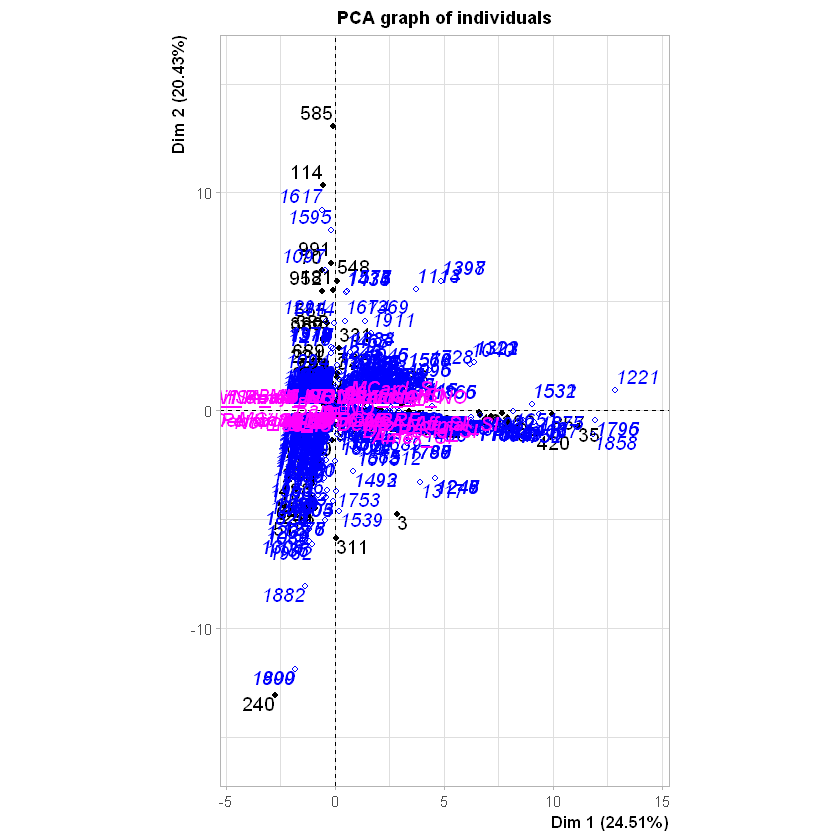

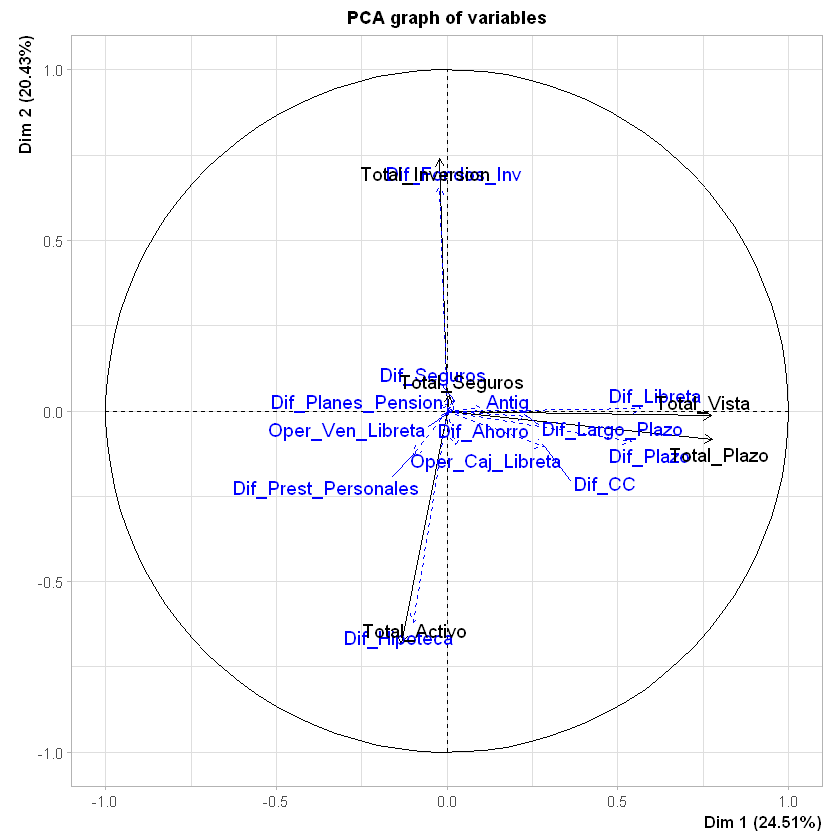

In [8]:
# EJECUCIÓN DEL ANÁLISIS DE COMPONENTES PRINCIPALES
nd = 4    # numero de dimensiones retenidas 
pca.churn <- PCA(churn, ncp=nd, quali.sup=c(1:3,5:12,18),
                 quanti.sup=c(4,19:30),
                 ind.sup=c(which(churn$Baja=="SI"))
                 )

1.	Con las componentes principales halladas significativas, efectúe una Clasificación Ascendente Jerárquica por el método de Ward. Explique en qué consiste el método de agregación de Ward?. Represente el dendrograma (o árbol jerárquico) obtenido. 

**Método de Ward:** 

El método de Ward es un criterio para la construcción de un árbol jerárquico. En cada integración de individuos en clusters hay una pérdida de información que se puede medir a través de la suma total de los cuadrados de las diferencias de cada individuo y el centroide del cluster en el que se integra. Para optimizar el proceso de clusterización de manera que se minimice la pérdida de información, Ward propone que en cada etapa de la creación del árbol jerárquico se unan los dos clusters para los cuales esta pérdida de información tenga el menor incremento. 

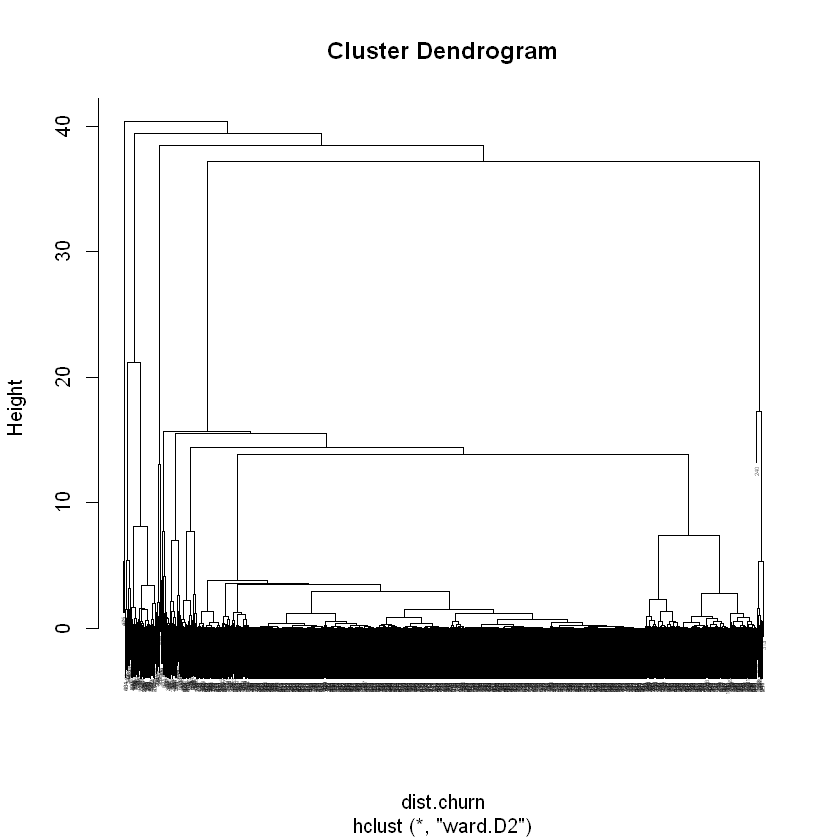

In [9]:
Psi = pca.churn$ind$coord

# CÁLCULO DE LA MATRIZ DE DISTANCIAS A PARTIR DE LAS LAS COMPONENTES SIGNFICATIVAS
dist.churn <- dist(Psi)

# CLUSTERING JERARQUICO, METODO DE Ward
hclus.churn <- hclust(dist.churn,method="ward.D2")

# PLOT DEL ÁRBOL JERÁRQUICO 
plot(hclus.churn,cex=0.3)

2.	A la vista del diagrama de barras del índice de nivel de las últimas agregaciones efectuadas, decida el número de clases de clientes diferentes que existen en los datos analizados. 


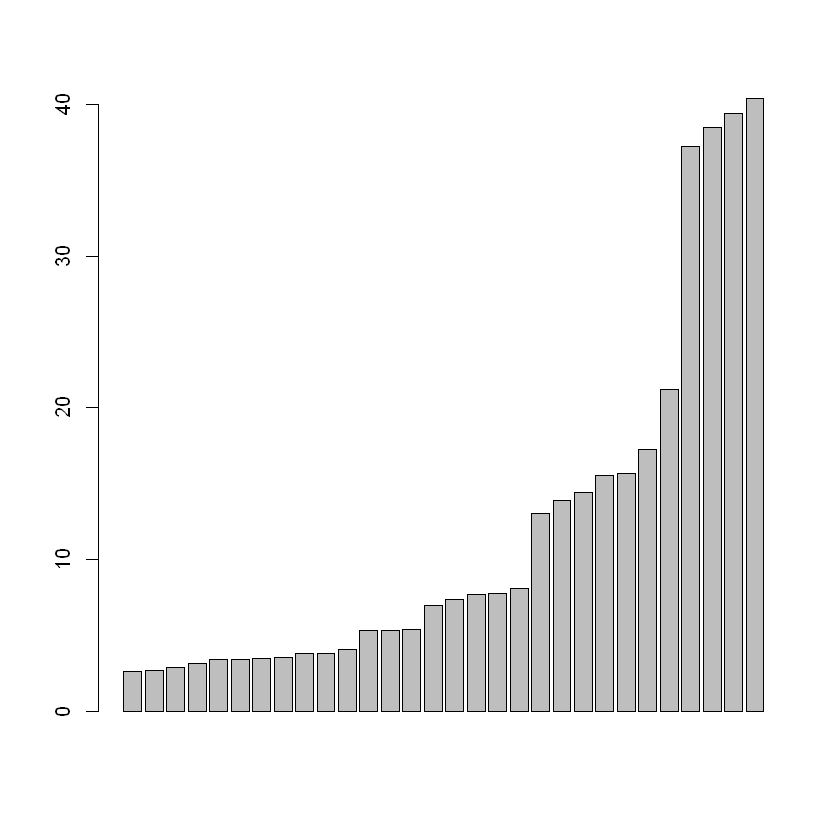

In [10]:
# DIAGRAMA DE BARRAS DEL INDICE DE AGREGACION DE LAS ULTIMAS 29 AGREGACIONES FORMADAS
barplot(hclus.churn$height[(sum(churn$Baja=="NO")-30):(sum(churn$Baja=="NO")-1)])

La diferencia entre barras más significativa aparece después de la cuarta barra empezando por la izquierda, por lo que cogemos 5 clases. En el dendograma del ejercicio anterior también vemos claramente donde aparecen estas 5 particiones con mayor altura.

In [11]:
#NÚMERO DE CLASES
nc=5

3.	Obtenga la partición del árbol jerárquico en el número de clases finales deseado. Diga el número de clientes por “cluster”, y calcule el centro de gravedad de los clusters obtenidos.


In [12]:
# CORTE DEL ÁRBOL DE AGREGACIÓN EN nc CLASES
cut <- cutree(hclus.churn,nc)

# NÚMERO DE CLIENTES POR CLASE
table(cut)

cut
  1   2   3   4   5 
929  12  50   7   2 

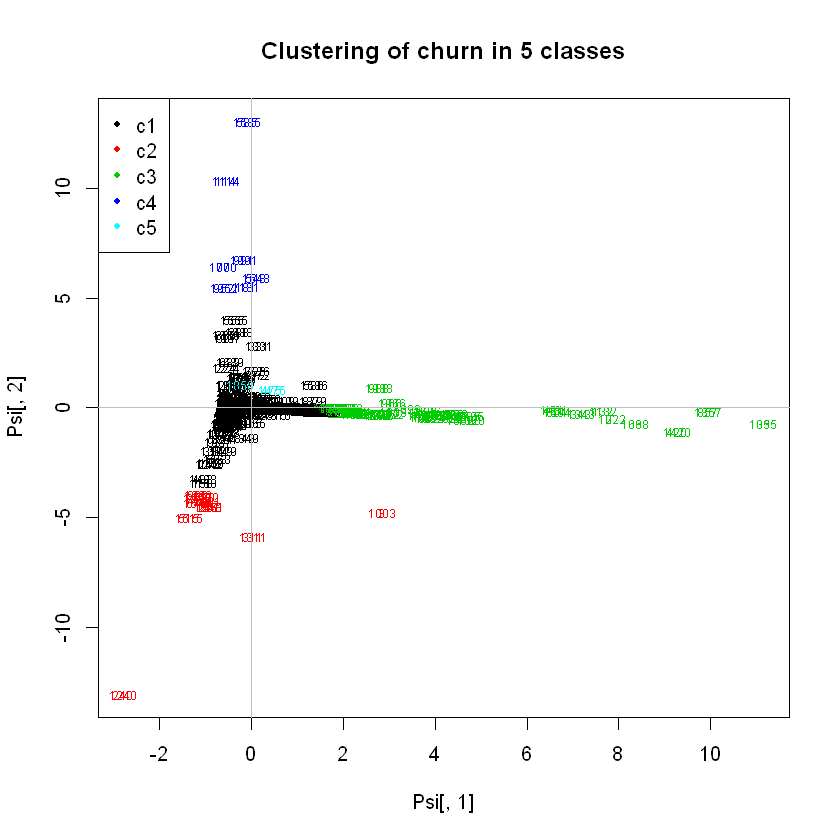

In [38]:
# GRÁFICO DE LAS nc CLASES EN EL PRIMER PLANO FACTORIAL
plot(Psi[,1],Psi[,2],type="n",main="Clustering of churn in 5 classes")
text(Psi[,1],Psi[,2],col=cut,labels=row.names(churn),cex = 0.6)
abline(h=0,v=0,col="gray")
legend("topleft",c("c1","c2","c3","c4","c5"),pch=20,col=c(1:5))

In [15]:
# CENTRO DE GRAVEDAD DE LAS CLASES
cdg.nc <- aggregate(as.data.frame(Psi),list(cut),mean)[,2:(nd+1)]
cdg.nc

Dim.1,Dim.2,Dim.3,Dim.4
-0.1938027,0.01932604,0.02818086,-0.1332193
-0.8015197,-5.21146890,-2.40725327,4.8409517
3.8276677,-0.21613527,-0.15227673,0.1299982
-0.2781584,7.64299582,-3.62433617,5.7806713
0.1123385,0.94476352,17.84560647,9.3523562


In [16]:
# CALIDAD DEL CORTE DEL ÁRBOL JERÁRQUICO
Bss <- sum(rowSums(cdg.nc^2)*as.numeric(table(cut)))
Tss <- sum(Psi^2)
100*Bss/Tss

[1] 71.56093

La calidad de la partición del árbol jerarquico es del ~71.56%

4.	En qué consiste la operación de consolidación de una partición obtenida por corte del árbol jerárquico. Efectúe esta operación en la partición obtenida en el apartado 3 anterior. Diga el número de clientes en las clases finales obtenidas.


**Consolidación:**

Al realizar el árbol jerárquico juntando pares de clusters con la menor pérdida de información, podemos acabar con algunos individuos que pertenezcan a un cluster impuesto por la partición jerárquica del árbol pero que en realidad estén más cerca de un centroide de otra clase. El proceso de consolidación permite corregir este error asociando estos individuos al cluster al que deberían pertenecer, y mejorando el clustering final. 

In [27]:
# CONSOLIDACIÓN DE LA PARTICIÓN

# ALGORITMO kmeans CON CENTROS INICIALES EN LOS CENTROIDES cdg.nc
kmeans <- kmeans(Psi,centers=cdg.nc)

# NÚMERO DE INDIVIDUOS POR CLASE FINAL
sapply(1:5, function(i) paste0("Clase ", i, ": ", kmeans$size[i]))

[1] "Clase 1: 943" "Clase 2: 17"  "Clase 3: 30"  "Clase 4: 8"   "Clase 5: 2"

In [36]:
# CALIDAD DE LA PARTICIÓN FINAL EN 5 CLASSES
100*kmeans$betweenss/kmeans$totss

[1] 73.18537

Después de realizar la consolidación, la calidad de la partición mejora de ~71.56% a ~73.18%

5.	Represente la partición final obtenida en el primer gráfico factorial, distinguiendo con colores diferentes cada una de las clases de clientes detectados. 

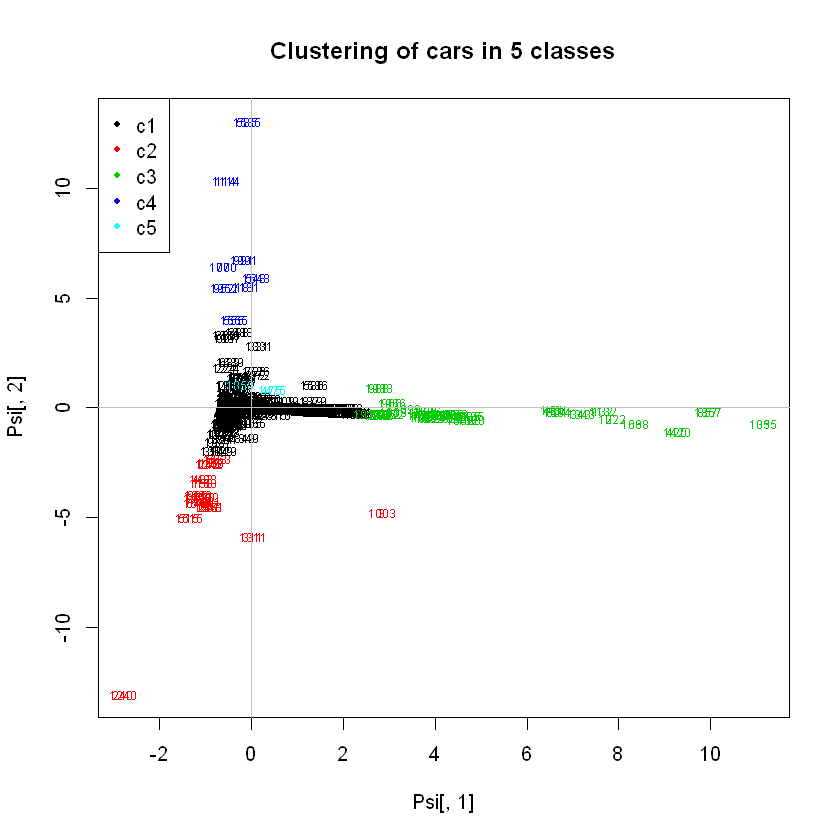

In [37]:
# VISUALIZACIÓN DE LAS nc CLASES FINALES EN EL PRIMER PLANO FACTORIAL
plot(Psi[,1],Psi[,2],type="n",main="Clustering of cars in 5 classes")
text(Psi[,1],Psi[,2],col=kmeans$cluster,labels=row.names(churn),cex = 0.6)
abline(h=0,v=0,col="gray")
legend("topleft",c("c1","c2","c3","c4","c5"),pch=20,col=c(1:5))

6.	Interpretamos las clases finales obtenidas. Para ello utilizamos la función “catdes” de R. Primero damos las características significativas de cada clase (identificada como `1` la primera clase por ejemplo) para las variables continuas (=quanti) (por ejemplo quanti$´1´ se refiere a las características significativas de las variables continuas en la primera clase). Después aparecen las modalidades (=category) significativas de las variables categóricas en cada una de las clases. Interprete y de un nombre a cada una de los tipos de cliente identificados.

In [40]:
# INTERPRETACÓN DE LAS 5 CLASES FINALES OBTENIDAS
#catdes(cbind(as.factor(kmeans$cluster),churn),num.var=1,proba=0.001)
catdes(cbind(as.factor(kmeans$cluster),churn[which(churn$Baja=="NO"),]),num.var=1,proba=0.001)


Link between the cluster variable and the categorical variables (chi-square test)
             p.value df
Baja    0.000000e+00  4
Pension 4.434178e-05  4
Edad    9.246903e-05 24
Amex    6.296829e-04  4

Description of each cluster by the categories
$`1`
NULL

$`2`
          Cla/Mod Mod/Cla Global     p.value    v.test
Edad=66..       0       0   35.8 0.000495095 -3.483396

$`3`
            Cla/Mod  Mod/Cla Global      p.value    v.test
Edad=66..  6.703911 80.00000   35.8 7.196586e-07  4.955982
Pension=SI 6.250000 63.33333   30.4 1.914268e-04  3.730070
Pension=NO 1.580460 36.66667   69.6 1.914268e-04 -3.730070

$`4`
NULL

$`5`
NULL


Link between the cluster variable and the quantitative variables
                      Eta2       P-value
Total_Seguros   0.81512250  0.000000e+00
Total_Inversion 0.74941183 3.593863e-297
Total_Activo    0.73444525 1.203901e-284
Dif_Hipoteca    0.56169594 1.702758e-176
Dif_Fondos_Inv  0.50607126 1.001642e-150
Total_Plazo     0.45725961 2.081869e-130
Dif_Se

Interpretación de clases:

**CLASE 1** - Clientes de menos categoría
Este grupo constituye a la mayoría de los clientes. Son clientes que tienen menos dinero a plazo, vista, en activo y en fondos de inversión que la media.

**CLASE 2** - Clientes recientemente hipotecados
Clientes con un total activo por encima de la media y con un cambio significativo en hipotecas en los últimos meses. 

**CLASE 3** - Clientes con dinero
Clientes to más dinero tanto a plazo como a vista. 

**CLASE 4** - Clientes inversores
Clientes con más fondos de inversión. 

**CLASE 5** - Clientes con seguros
Clientes que han contratado más seguros. 

7.	Efectúe ahora la asignación de los clientes que han sido baja en la tipología de clientes anterior (utilice para ello la función knn1 de la librería class). 

In [42]:
# ASIGNACIÓN CLIENTES DE BAJA
pred.sup <- knn1(kmeans$centers, pca.churn$ind.sup$coord[,1:nd], cl=c("c1","c2","c3","c4","c5"))
#pred.sup
table(pred.sup)

pred.sup
 c1  c2  c3  c4  c5 
812  50 111  15   8 

8.	Represente gráficamente (función barplot) la proporción de clientes en cada una de las clases, tanto los clientes “normales”, como los que han sido baja. ¿Podemos deducir que algunos clusters tienen un riesgo de baja mayor que otros?. 

Clusters,Activos,Bajas
c1,943,812
c3,17,111
c2,30,50
c4,8,15
c5,2,8


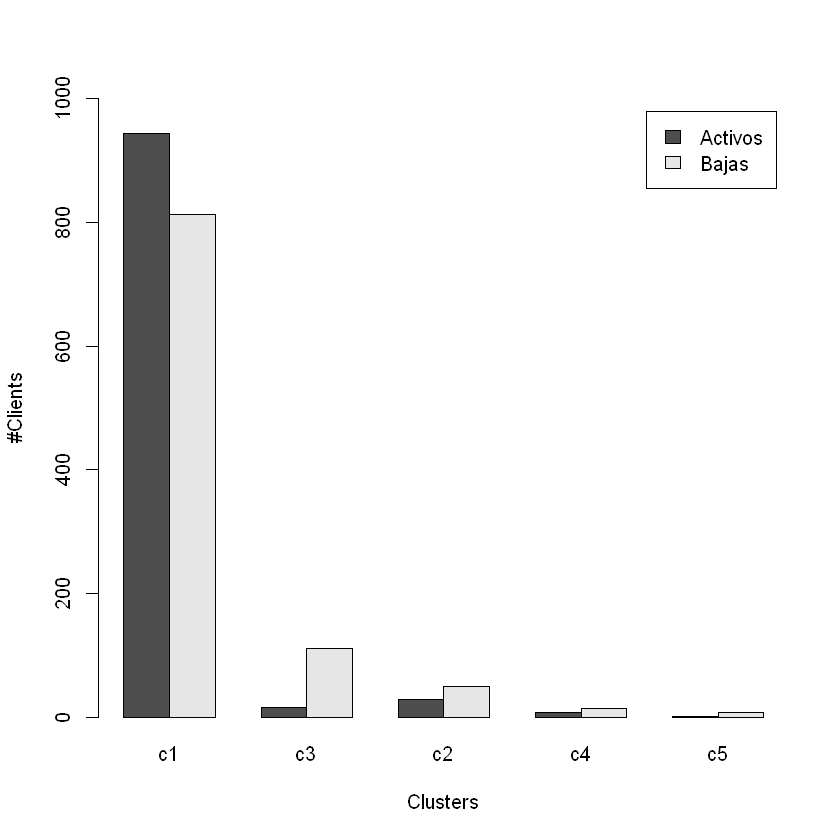

In [43]:
pred.sup.agg <- sapply(unique(pred.sup), function(i) sum(pred.sup==i))
clusters.churn <- data.frame(
                     Clusters = unique(pred.sup),
                     Activos = kmeans$size,
                     Bajas = pred.sup.agg)
clusters.churn

barplot(t(select(clusters.churn, 2,3)), 
        beside = TRUE,
        names.arg = clusters.churn$Clusters,
        legend.text = TRUE,
        ylim = c(0,1000),
        ylab = "#Clients",
        xlab = "Clusters")


La gráfica indica que la proporción de clientes activos y bajas en cada cluster no es la misma. 
Vemos que hay un porcentage menor de bajas en la primera clase, que constituye a clientes de menos nivel, y que en la clase de clientes con más dinero (3) el porcentage de bajas es particularmente alto. En las otras clases, también vemos riesgo de bajas mayor a los clientes activos, aunque no tan significativo. 
Como hemos visto previamente, parece que los clientes de mayor interés tienen un riesgo particularmente algo de baja, lo que es problemático. 